 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Matice-(matrix)" data-toc-modified-id="Matice-(matrix)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matice (matrix)</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Použití-matic" data-toc-modified-id="Použití-matic-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Použití matic</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Pole-(array)" data-toc-modified-id="Pole-(array)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pole (array)</a></span></li></ul></div>

# Datové struktury v R

Tato lekce se zaměřuje na to, co pravděpodobně budete potřebovat na začátku každé datové analýzy, tj. znát jaké možnosti reprezantace vašeho datového souboru vám R nabízí a jakou nejlépe zvolit.

V [předchozí lekci](../03/) jsme si již představili vektory, které představují asi nejpřímočařejší cestu k reprezentaci analyzovaných dat, neboť ve statistice nejsou jednolivá měření nebo vzorky nic víc než jen pouhá řada čísel. Někdy ale budete muset načíst i data strukturovaná trochu jinak (například vzorky měřené současně na několika přístrojích). V této lekci si tedy ukážeme další struktury, které na vektorech staví ale nabízí rozšířenou funkcionalitu pro pohodlnější práci s různými typy dat. 

## Matice (matrix)

S maticemi jste se určitě už setkali v matematice, takže víte, že to jsou vlastně vektory naskládané pod sebe. V R si můžete matice představit jako vektor, který má nevíc ještě dva atributy, kterými jsou počet řádek a počet sloupců. Že je tomu skutečně tak ukazuje následující kód, který pro přiřazení použíje funkci `dim`, která zajišťuje přístup k oběma atributům:

In [1]:
x <- 1:12
dim(x) <- c(4, 3) # převedení vektoru na matici

class(x)
x
attributes(x) # některé objekty v R mohou mít atributy, co přesně
dim(x)
nrow(x) # počet řádek
ncol(x) # počet sloupců

[1] "matrix"

1,5,9
2,6,10
3,7,11
4,8,12


$dim
[1] 4 3

[1] 4 3

[1] 4

[1] 3

Toto je sice netradiční způsob vytvoření matice, ale ukazuje nám, co vlastně matice pro R znamená. V tomto případě je třeba vždy zadat počet řádků i počet sloupců, protože vlastně nastavujeme přímo konkrétní atribut výsledného vektoru. Použití funkce `matrix` už takové omezení nemá:

In [2]:
m_x <- matrix(x, nrow = 4)
dim(m_x)
class(m_x)
m_x
attributes(m_x)

[1] 4 3

[1] "matrix"

1,5,9
2,6,10
3,7,11
4,8,12


$dim
[1] 4 3

Tento postup je tedy čitelnější a o něco jednodušší, neboť rozdělení na sloupce již R vyřeší za vás. Stejného výsledku byste docíli i takto:

In [3]:
m_x <- matrix(x, ncol = 3)
print(m_x)
m_x <- matrix(x, nrow = 4, ncol=3)
print(m_x)

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


Je třeba si též uvědomit, že rozdíl mezi použitím postupu s funkcí `matrix` oproti funkci `dim` je i v tom, že pomocí funkce `dim` je modifikován stávající objekt, ale funkce matrix vrací objekt nový. Při použití funkce `dim` tedy nedochází ke kopírování, což znamená rychlejší vykonávání, avšak za ztráty struktury původního objektu.

Jak jste si asi všimli, při vytváření matice z vektoru se postupuje podle sloupců nikoliv řádků. Pokud to chcete naopak můžete nastavit parametr `byrow` na `TRUE`:

In [4]:
m_x <- matrix(x, ncol = 3, byrow = T)
m_x

1,2,3
4,5,6
7,8,9
10,11,12


Matice lze vytvářet i přímo z vektorů pomocí funkce `as.matrix`. Výsledkem je pak jednorozměrná matice:

In [5]:
as.matrix(1:10)

1
2
3
4
5
6
7
8
9
10


V jednom z příkladů nahoře též vidíte, že funkce `print` vám kromě samotné matice ukáže navíc i další informace. Ty se týkají souřadnic (indexů) jednotlivých prvků. Je to v podstatě i návod, jak k jednotlivým prvkům přistupovat:

In [6]:
m_x[1,1]
m_x[2,2]
m_x[3,3]
m_x[4,3]

[1] 1

[1] 5

[1] 9

[1] 12

Pokud jeden z indexů vynecháte, dostanete vektor reprezentující celý řádek nebo sloupec:

In [7]:
m_x[,1]
m_x[1,]
m_x[-1,] # i negativní indexy fungují, jak by člověk čekal

[1]  1  4  7 10

[1] 1 2 3

4,5,6
7,8,9
10,11,12


Jako indexy můžete samozřejmě používat i vektory:

In [8]:
print(
    m_x[c(3, 4), 2:3] # numerické
)
print(
    m_x[c(F, F, T, T), c(F, T, T)] # nebo logické
)

     [,1] [,2]
[1,]    8    9
[2,]   11   12
     [,1] [,2]
[1,]    8    9
[2,]   11   12


nebo dokonce matice samotné:

In [9]:
print(m_x)
maska <- matrix(
    c(
        T, T, T,
        F, F, F,
        T, T, T,
        F, F, F
    )
    , nrow = 4
    , byrow = T
)
print(maska)
m_x[maska]

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
[4,]   10   11   12
      [,1]  [,2]  [,3]
[1,]  TRUE  TRUE  TRUE
[2,] FALSE FALSE FALSE
[3,]  TRUE  TRUE  TRUE
[4,] FALSE FALSE FALSE


[1] 1 7 2 8 3 9

Všimněte si, že zde je výsledkem vektor čísel, která odpovídají vybraným hodnotám v naší masce a to opět podle sloupců.

Pokud z matice vybíráme pouze jednu dimenzi, R automaticky vrátí výsledek též jako vektor:

In [10]:
vyber <- m_x[1,]
vyber
class(vyber)
dim(vyber)

[1] 1 2 3

[1] "integer"

NULL

Pokud tomu chceme zamezit, můžeme funkci `[` specifikovat argument `drop`, který toto chování řídí (ano, `[` je funkce stejně jako všechny operace v R):

In [11]:
vyber <- m_x[1,, drop = F]
vyber
class(vyber)
dim(vyber)

1,2,3


[1] "matrix"

[1] 1 3

Do matic lze samozřejmě pomocí indexů i zapisovat:

In [12]:
print(m_x)
m_x[,1] <- c(1, 2, 3, 4) # nastav obsah prvniho sloupce na daný vektor
print(m_x)
m_x[,1] <- c(1, 2)
print(m_x) # i zde funguje recyklace hodnot vektoru

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
[4,]   10   11   12
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    5    6
[3,]    3    8    9
[4,]    4   11   12
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    5    6
[3,]    1    8    9
[4,]    2   11   12


In [13]:
m_x[c(3, 4), 2:3] <- matrix(numeric(4), nrow = 2)
print(m_x)
m_x[c(3, 4), 2:3] <- c("a", "b", "c", "d") # je možné rovnoou i zapsat vektor správné délky
print(m_x)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    5    6
[3,]    1    0    0
[4,]    2    0    0
     [,1] [,2] [,3]
[1,] "1"  "2"  "3" 
[2,] "2"  "5"  "6" 
[3,] "1"  "a"  "c" 
[4,] "2"  "b"  "d" 


Všimněte si, že i matice mohou být pouze jednoho typu, stejně jako vektory. Po přiřazení vektoru dat jiného typu (zde `character`) se všechny prvky převedou na největší společný typ, tedy opět `character`.

Stejně jako s vektory je možné i s maticemi provádět různé operace. Například:

In [14]:
m_y <- matrix(1:4, nrow = 2, byrow = T)
m_y

print(
    m_y * 2
)
print(
    m_y > 2
)
print(
    m_y + m_y # sčítání
)
print(
    m_y * m_y # klasické násobení
)
print(
    m_y %*% m_y # maticové násobení
)
print(
    t(m_y) # transponovaná matice
)

1,2
3,4


     [,1] [,2]
[1,]    2    4
[2,]    6    8
      [,1]  [,2]
[1,] FALSE FALSE
[2,]  TRUE  TRUE
     [,1] [,2]
[1,]    2    4
[2,]    6    8
     [,1] [,2]
[1,]    1    4
[2,]    9   16
     [,1] [,2]
[1,]    7   10
[2,]   15   22
     [,1] [,2]
[1,]    1    3
[2,]    2    4


Stejně jako u vektorů lze jednotlivé řádky a sloupce v matici pojmenovávat:

In [15]:
colnames(m_y) <- c("první sloupec", "druhý sloupec")
rownames(m_y) <- c("první řádek", "druhý řádek")
attributes(m_y)
colnames(m_y)
rownames(m_y)
m_y

$dim
[1] 2 2

$dimnames
$dimnames[[1]]
[1] "první řádek" "druhý řádek"

$dimnames[[2]]
[1] "první sloupec" "druhý sloupec"

[1] "první sloupec" "druhý sloupec"

[1] "první řádek" "druhý řádek"

,první sloupec,druhý sloupec
první řádek,1,2
druhý řádek,3,4


### Použití matic

Matice je v podstatě tabulka, a proto se ve statistice nejčastěji používá k zakódování výsledků měření různých číselných proměnných (sloupce) pro řadu vzorků (řádky). Například následující matice kóduje nejrůznější data o třech lidech:

In [16]:
data <- matrix(
    c(
        0, 65, 20,
        1, 75, 19,
        0, 68, 21
    )
    , byrow = T
    , nrow = 3
)
colnames(data) <- c("pohlaví", "váha", "věk")
rownames(data) <- c(1:nrow(data))
data

,pohlaví,váha,věk
1,0,65,20
2,1,75,19
3,0,68,21


Asi vás napadlo, že matice má nevýhodu v tom, že všechny položky můsí být reprezentovány číselně, a tudíž je sloupec `pohlaví` nečitelný, neboť musíme vědět podle jakého klíče jsou hodnoty kódovány. Tento problém řeší datová struktura `data.frame`, která je rozšířením matic a představíme si ji za nedlouho.

Matice jsou též vhodné pro reprezentaci obrázků a podobných dat, neboť jednotlivé prvky mohou snadno reprezentovat barvu jednotlivých pixelů. Mezi testovacími daty, která jsou v R dostupná pod různými proměnnými, je například množina [volcano](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/volcano.html), která poskytuje topologická data o sopce Maunga Whau, která se nachází nedaleko od Aucklandu. Tuto matici si lze jako obrázek vykreslit například takto:

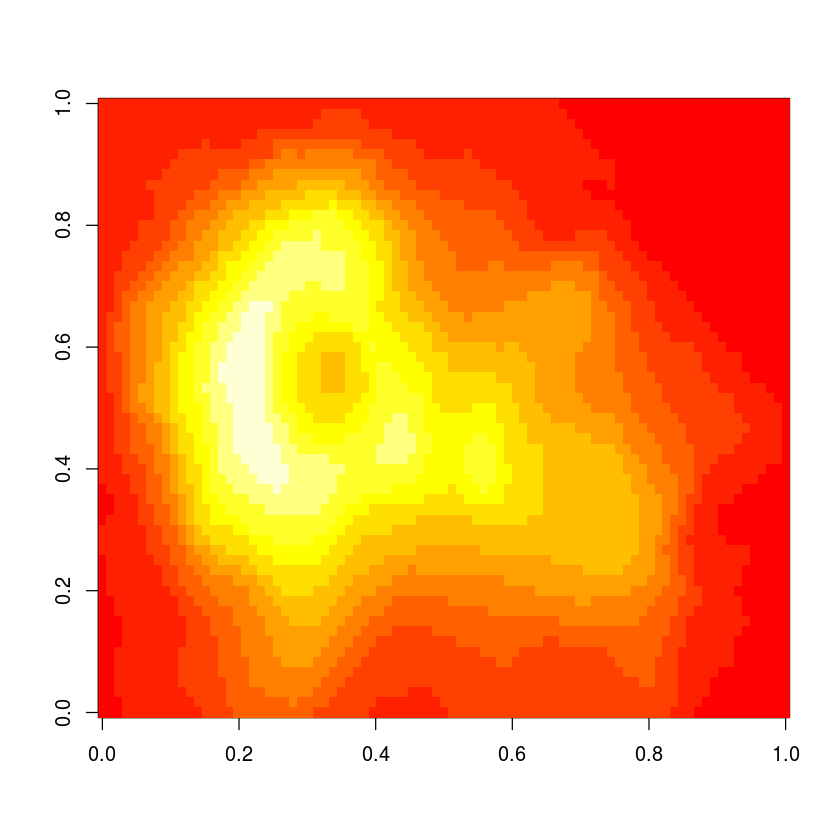

In [17]:
image(volcano)

## Pole (array)

In [18]:
TODO

ERROR: Error in eval(expr, envir, enclos): object 'TODO' not found
